<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu


In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


importing basic files 

In [0]:
from google.colab import files
uploaded=files.upload()


to import data file stored in local computer

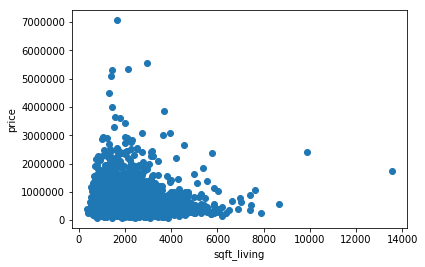

      5
0  1250
1  2040
2  2140
3  2510
4  2200           2
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0


In [53]:
import io
df2=io.BytesIO(uploaded['kc_house_data.csv']) 
y_train=pd.read_csv(df2,nrows=7000,usecols=[2],skiprows=[0],header=None)  # importing y parameter from col 2  (price)
x_train=pd.read_csv(df2,nrows=7000,usecols=[5],skiprows=[0],header=None)   # importing x parameter from col 5 (sqft living) 
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(x_train,y_train)
plt.show()
print(x_train.head(),y_train.head())

w_value 0.4


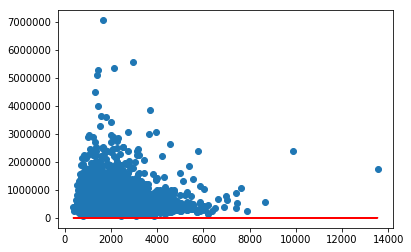

y_train            2
0   221900.0
1   538000.0
2   180000.0
3   604000.0
4   510000.0
5  1225000.0
6   257500.0
7   291850.0
8   229500.0
9   323000.0
x_train       5
0  1250
1  2040
2  2140
3  2510
4  2200
5  2170
6  2980
7  1180
8  1540
9  1540
y_learned              5
0   500.000007
1   816.000012
2   856.000013
3  1004.000015
4   880.000013
5   868.000013
6  1192.000018
7   472.000007
8   616.000009
9   616.000009


In [54]:
learning_rate=0.001
X=tf.placeholder(tf.float32)  #declaring placeholders whose value will be feeded during session
Y=tf.placeholder(tf.float32)

def model(X,w):  
  return tf.multiply(X,w)     #creating model function to return X*w

w=tf.Variable(0.0,name="weight")    #weight parameter
y_model=model(X,w)      # y predicted value
cost =tf.square(Y-y_model)   #declaring cost function

train_op=tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(cost)  #usin momnetum optimizer to minimize cost with ,moment =0.9

sess=tf.Session()   #declaring sessions 
init=tf.global_variables_initializer()   # initializing global variables
sess.run(init)

for i in range(0,7000):
  for (x,y) in zip(x_train,y_train):
    sess.run(train_op,feed_dict={X:x,Y:y})  #fedding placehoder values
    
w_val=(sess.run(w))   #the final weight of w calculated
sess.close()
print('w_value',w_val)
plt.scatter(x_train,y_train)
y_learned=x_train*w_val
plt.plot(x_train,y_learned,'r')
plt.show()
print('y_train',y_train.head(n=10))
print('x_train',x_train.head(n=10))
print('y_learned',y_learned.head(n=10))


